In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import json
from datetime import datetime

In [2]:
req=requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares")
data=req.text

In [3]:
soup=BeautifulSoup(data,'html.parser')

In [4]:
table=soup.find("table")
table=table.find("tbody")
rank,x_class,date,region,start_time,max_time,end_time,movie=[],[],[],[],[],[],[],[]

In [5]:
for i in table.find_all("tr"):
    tds=i.find_all("td")
    rank.append(tds[0].text)
    x_class.append(tds[1].text)
    date.append(tds[2].text)
    region.append(tds[3].text)
    start_time.append(tds[4].text)
    max_time.append(tds[5].text)
    end_time.append(tds[6].text)
    movie.append(tds[7].text)

In [6]:
DF_Columns={'rank':rank,'x_class':x_class,'date':date,'region':region,'start_time':start_time,'max_time':max_time,'end_time':end_time,'movie':movie}

In [7]:
Df=pd.DataFrame(DF_Columns)

In [8]:
Df.head()

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,0486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,0808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive


In [9]:
Df.drop(['movie'],axis=1,inplace=True)

In [10]:
Df.head()

,rank,x_class,date,region,start_time,max_time,end_time
0,1,X28+,2003/11/04,0486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24
3,4,X17+,2005/09/07,0808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55


In [11]:
date_time_s=pd.to_datetime(Df['date']+' '+Df['start_time'])
date_time_m=pd.to_datetime(Df['date']+' '+Df['max_time'])
date_time_e=pd.to_datetime(Df['date']+' '+Df['end_time'])

In [12]:
Df['start_time'],Df['end_time'],Df['max_time']=date_time_s,date_time_e,date_time_m

In [13]:
Df.head()

,rank,x_class,date,region,start_time,max_time,end_time
0,1,X28+,2003/11/04,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,2001/04/02,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,2003/10/28,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,2005/09/07,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,2001/04/15,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


In [14]:
Df.drop(['date'],axis=1,inplace=True)

In [15]:
Df.head()

,rank,x_class,region,start_time,max_time,end_time
0,1,X28+,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


In [16]:
req_2=requests.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html")
soup_2=BeautifulSoup(req_2.text,'html.parser')

In [17]:
table=soup_2.find("pre")

In [18]:
data=table.text

In [19]:
lines=data.split("\n")

In [20]:
lines[12]

'1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX'

In [21]:
s=lines[529]
s=s[:54]+' '+s[56:]
lines[529]=s

In [22]:
lines=lines[12:530]

In [23]:
import re
re.split
s_date,s_time,e_date,e_time,s_freq,e_freq,f_loc,f_reg,imp,cme_date,cme_time,cpa,width,speed,plots=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
for i in lines:
    da=re.split('\s+',i)
    #print(da)
    s_date.append(da[0]), s_time.append(da[1]),e_date.append(da[2]),e_time.append(da[3]),s_freq.append(da[4]),
    e_freq.append(da[5]),f_loc.append(da[6]),f_reg.append(da[7]),imp.append(da[8]),cme_date.append(da[9]),
    cme_time.append(da[10]),cpa.append(da[11]),width.append(da[12]),speed.append(da[13]),plots.append(da[14])

#print(len(s_date)),print(len(s_time)),print(len(e_date)),print(len(e_time)),print(len(s_freq)),print(len(e_freq))
#print(len(f_loc)),print(len(f_reg)),print(len(imp)),print(len(cme_date)),print(len(cme_time)),print(len(cpa))
#print(cme_time)

In [24]:
df_columns={'start_date':s_date,'start_time':s_time,'end_date':e_date,'end_time':e_time,'start_frequency':s_freq,
           'end_frequency':e_freq,'flare_location':f_loc,'flare_region':f_reg,'importance':imp,'CME_Date':cme_date
           ,'CME_time':cme_time,'CPA':cpa,'Width':width,'Speed':speed,'plots':plots}

In [25]:
Df_2=pd.DataFrame(df_columns)

In [26]:
Df_2.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,CME_Date,CME_time,CPA,Width,Speed,plots
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX


In [27]:
is_halo=[i=='Halo' for i in Df_2['CPA']]
ser=pd.Series(name='is_halo',data=is_halo)
Df_2['is_halo']=ser

In [28]:
Df_2['CPA'].replace({"Halo":'NaN'},inplace=True)
Df_2['start_frequency'].replace({"????":"NaN"},inplace=True)
Df_2['end_frequency'].replace({"????":"NaN"},inplace=True)
Df_2['flare_region'].replace({"-----":"NaN"},inplace=True)
Df_2.replace({"----":"NaN","--/--":'NaN','--:--':'NaN','---':'NaN'},inplace=True)

In [29]:
Width_Lower=['>' in i for i in Df_2['Width']]
Df_2['Width_Lower']=pd.Series(Width_Lower)
_Width=[]
for i in range(len(Df_2['Width'])):
    _Width.append(Df_2['Width'][i].translate({ord('>'):None}))
Df_2['Width']=_Width

In [30]:
date_time_s=pd.to_datetime(Df_2['start_date']+' '+Df_2['start_time'])
Df_2.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,CME_Date,CME_time,CPA,Width,Speed,plots,is_halo,Width_Lower
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,False,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,PHTX,True,False
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,PHTX,True,False
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX,False,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX,False,False


In [31]:
_list=[str(i.year) for i in date_time_s]
Df_2['end_date']=pd.Series(_list)+'/'+Df_2['end_date']

In [32]:
Df_2.columns

Index(['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency',
       'end_frequency', 'flare_location', 'flare_region', 'importance',
       'CME_Date', 'CME_time', 'CPA', 'Width', 'Speed', 'plots', 'is_halo',
       'Width_Lower'],
      dtype='object')

In [33]:
date_time_e=[]
import datetime
for i in range(len(Df_2['end_date'])):
    edate=Df_2['end_date'][i]
    e_time=Df_2['end_time'][i]
    #print(e_time)
    #print(edate)
    #break;
    if(Df_2['end_time'][i]=="24:00"):
        date_object = datetime.datetime.strptime(edate, '%Y/%m/%d').date()
        e_time="00:00"
        date_object+=datetime.timedelta(days=1)
        edate=str(date_object)
    date_time_e.append(edate+' '+e_time)

In [34]:
date_time_e=pd.to_datetime(date_time_e)

In [35]:
temp_list=[]
for i in range(len(Df_2)):
    if(Df_2['CME_Date'][i]!='NaN' and Df_2['CME_time'][i]!='NaN'):
        temp_list.append(_list[i]+'/'+Df_2['CME_Date'][i])
    else:
        temp_list.append("NaN")

In [36]:
date_time_CME=[]
#print(Df_2['CME_time'])
for i in temp_list:
    if i!='NaN':
        date_time_CME.append(str(pd.to_datetime(i+' '+Df_2['CME_time'][temp_list.index(i)])))
    else:
        date_time_CME.append('NaN')

In [37]:
Df_2.columns

Index(['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency',
       'end_frequency', 'flare_location', 'flare_region', 'importance',
       'CME_Date', 'CME_time', 'CPA', 'Width', 'Speed', 'plots', 'is_halo',
       'Width_Lower'],
      dtype='object')

In [38]:
Df_2['start_date'],Df_2['end_date'],Df_2['CME_Date']=pd.Series(date_time_s),date_time_e,pd.Series(date_time_CME)
Df_2.drop(['start_time','end_time','CME_time'],axis=1,inplace=True)

In [39]:
Df_2.columns

Index(['start_date', 'end_date', 'start_frequency', 'end_frequency',
       'flare_location', 'flare_region', 'importance', 'CME_Date', 'CPA',
       'Width', 'Speed', 'plots', 'is_halo', 'Width_Lower'],
      dtype='object')

In [40]:
Df_2.rename(columns={'start_date':'Start_DateTime','end_date':'End_DateTime','CME_Date':'CME_DateTime'},inplace=True)

In [41]:
Df_2.head()

,Start_DateTime,End_DateTime,start_frequency,end_frequency,flare_location,flare_region,importance,CME_DateTime,CPA,Width,Speed,plots,is_halo,Width_Lower
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False


In [42]:
_date=[i.date() for i in Df['start_time']]

In [43]:
_2date=[i.date() for i in Df_2['Start_DateTime']]

In [44]:
Df['Date']=_date
Df_2['Date']=_2date

In [45]:
Df.head()

,rank,x_class,region,start_time,max_time,end_time,Date
0,1,X28+,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,2003-11-04
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,2001-04-02
2,3,X17.2+,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,2003-10-28
3,4,X17+,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,2005-09-07
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,2001-04-15


In [46]:
Df_2.head()

,Start_DateTime,End_DateTime,start_frequency,end_frequency,flare_location,flare_region,importance,CME_DateTime,CPA,Width,Speed,plots,is_halo,Width_Lower,Date
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False,1997-04-01
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False,1997-04-07
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False,1997-05-12
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False,1997-05-21
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False,1997-09-23


In [47]:
_xclassFlares=[i for i in range(len(Df_2)) if 'X' in Df_2['importance'][i]]

In [48]:
Df_2_=Df_2.loc[_xclassFlares,:]

In [49]:
temp_Imp=[i.replace('X','') for i in Df_2_['importance']]

In [50]:
temp_Imp=list(map(float,temp_Imp))

In [51]:
Df_2_['importance']=temp_Imp

In [52]:
Replicated_Data=Df_2_.sort_values('importance',ascending=False)[0:50]

# Replication

Replicated data is not the same as the top 50 flares in spaceweatherlive.com as there's some missing data in the nasa table about flares and some damaged data .
to replicate data I had to extract the X class flares from the nasa table then sort them according to each number beside the X by stripping out any non numeric data from the importance column and converting it to float to sort the dataframe according to column

In [72]:
Replicated_Data.head()

,Start_DateTime,End_DateTime,start_frequency,end_frequency,flare_location,flare_region,importance,CME_DateTime,CPA,Width,Speed,plots,is_halo,Width_Lower,Date
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,28.0,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False,2003-11-04
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,20.0,2001-04-02 11:26:00,261,244,2505,PHTX,False,False,2001-04-02
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,17.0,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False,2003-10-28
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,14.0,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,2001-04-15
234,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,10.0,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False,2003-10-29


# Integrated Data
Data integration was based on the x_class of both tables and the start date (only date not datetime) and the region of the flare but only out of the 50 top flares on SpaceWeatherLive.com 31 matchings were found on the NASA table.

In [54]:
_xclassClean=[i.replace('X','') for i in Df['x_class']]
_xclassClean=[i.replace('+','') for i in _xclassClean]

In [55]:
_xclassClean=list(map(float,_xclassClean))
Df['x_class']=_xclassClean

In [56]:
inner_joined_DF=pd.merge(left=Df,right=Df_2_,left_on=['x_class','Date'],right_on=['importance','Date'])

In [57]:
rowsToDrop=[]
for i in range(len(inner_joined_DF)):
    if(inner_joined_DF['region'][i] not in inner_joined_DF['flare_region'][i]):
        rowsToDrop.append(i)

In [58]:
inner_joined_DF.drop(index=rowsToDrop,inplace=True)

In [76]:
print('num of elements: '+str(len(inner_joined_DF)))
inner_joined_DF.head()

num of elements: 31


,rank,x_class,region,start_time,max_time,end_time,Date,Start_DateTime,End_DateTime,start_frequency,...,flare_location,flare_region,importance,CME_DateTime,CPA,Width,Speed,plots,is_halo,Width_Lower
0,1,28.0,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,2003-11-04,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,...,S19W83,10486,28.0,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False
1,2,20.0,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,2001-04-02,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,...,N19W72,9393,20.0,2001-04-02 11:26:00,261,244,2505,PHTX,False,False
2,6,10.0,0486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,2003-10-29,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,...,S15W02,10486,10.0,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False
3,7,9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,1997-11-06,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,...,S18W63,8100,9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False
4,8,9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2017-09-06,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,...,S08W33,12673,9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False


# Analysis part

In [60]:
Top50NasaFlare=Replicated_Data[0:50]

In [61]:
import matplotlib.pyplot as plt

In [62]:
Top50NasaFlare['importance']=['X'+ str(i) for i in Top50NasaFlare['importance']]

In [63]:
Top50NasaFlare

,Start_DateTime,End_DateTime,start_frequency,end_frequency,flare_location,flare_region,importance,CME_DateTime,CPA,Width,Speed,plots,is_halo,Width_Lower,Date
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.0,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False,2003-11-04
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.0,2001-04-02 11:26:00,261,244,2505,PHTX,False,False,2001-04-02
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.0,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False,2003-10-28
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.0,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,2001-04-15
234,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.0,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False,2003-10-29
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,1997-11-06
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False,2017-09-06
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,PHTX,False,False,2006-12-05
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 09:30:00,NaN,360,2598,PHTX,True,False,2003-11-02
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False,2017-09-10


In [64]:
Frequency_plots=Top50NasaFlare[['start_frequency','end_frequency','Start_DateTime','End_DateTime']]

In [65]:
Frequency_plots["start_frequency"]=pd.to_numeric(Frequency_plots["start_frequency"])
Frequency_plots['end_frequency']=pd.to_numeric(Frequency_plots['end_frequency'])

C:\Users\Amro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Amro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
Frequency_plots.head()

,start_frequency,end_frequency,Start_DateTime,End_DateTime
240,10000,200,2003-11-04 20:00:00,2003-11-05 00:00:00
117,14000,250,2001-04-02 22:05:00,2001-04-03 02:30:00
233,14000,40,2003-10-28 11:10:00,2003-10-30 00:00:00
126,14000,40,2001-04-15 14:05:00,2001-04-16 13:00:00
234,11000,500,2003-10-29 20:55:00,2003-10-30 00:00:00


C:\Users\Amro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Amro\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\Amro\Anaconda3\lib\site-packages

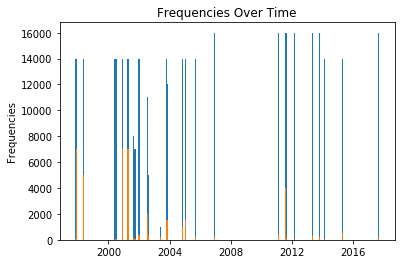

In [67]:
plt.ylabel('Frequencies')
plt.title('Frequencies Over Time')
Start=plt.subplot()
x=Frequency_plots['Start_DateTime']
y=Frequency_plots['start_frequency']
Start.bar(x=x,height=y,width=30)
Start.xaxis_date()
End=plt.subplot()
x_2=Frequency_plots['End_DateTime']
y_2=Frequency_plots['end_frequency']
End.bar(x=x_2,height=y_2,width=30)
End.xaxis_date()
plt.show()

Total halo flares in dataset is :286
number of halo flares in top 50 flare is :42


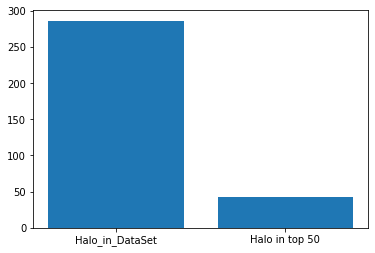

In [68]:
isHaloInTotalDataset=Df_2["is_halo"].value_counts()[1]
print("Total halo flares in dataset is :"+str(isHaloInTotalDataset))
isHaloInTop50=Top50NasaFlare['is_halo'].value_counts()[1]
print("number of halo flares in top 50 flare is :"+str(isHaloInTop50))
X=['Halo_in_DataSet','Halo in top 50']
Y=[isHaloInTotalDataset,isHaloInTop50]
Halo_plot=plt.subplot()
Halo_plot.bar(X,Y)
plt.show()

In [69]:
#Top50NasaFlare['Date']=pd.to_datetime(Top50NasaFlare['Date']).dt.to_period('M')
#Top50NasaFlare= Top50NasaFlare.groupby(["Date"]).count()


In [70]:
Last_Plot_Data=Top50NasaFlare[['end_frequency','Date']]
Last_Plot_Data=Last_Plot_Data.groupby(['Date']).count()

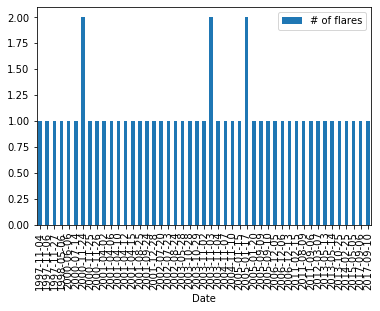

In [71]:
Last_Plot_Data.rename(columns={'end_frequency':'# of flares'},inplace=True)
Last_Plot_Data.plot.bar()
plt.show()